In [0]:
 ! pip install -q kaggle

In [0]:
 from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trlhunhminh","key":"852dda592231de6cf33d7c2bfc28ec1b"}'}

In [0]:
 ! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
 ! kaggle datasets list

ref                                                         title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)     2GB  2020-05-02 20:35:01          62435  
divyansh22/us-border-crossing-data                          US Border Crossing Data                                2MB  2020-04-19 09:38:10           1200  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                           142MB  2020-04-29 22:47:23           7250  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                          3GB  2020-04-19 14:48:39            110  
doaaalsenani/usa-cers-dataset                             

In [0]:
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 86.3MB/s]


In [0]:
from zipfile import ZipFile

file_name='avocado-prices.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:

import pandas as pd
avocado= pd.read_csv('/content/avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
print(avocado.columns)
del avocado['Unnamed: 0']#remove column index because of no use

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [0]:
avocado.columns
avocado.head()
#4060 mean columns Total number of avocados with PLU 4046 sold
#4225	mean columns Total number of avocados with PLU 4225 sold
#4770 columns	mean Total number of avocados with PLU 4770 sold
#tyle columns mean avocado is conventional or organic

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
dtypes_col= avocado.dtypes
dict(dtypes_col)#we can see type of each column

{'4046': dtype('float64'),
 '4225': dtype('float64'),
 '4770': dtype('float64'),
 'AveragePrice': dtype('float64'),
 'Date': dtype('O'),
 'Large Bags': dtype('float64'),
 'Small Bags': dtype('float64'),
 'Total Bags': dtype('float64'),
 'Total Volume': dtype('float64'),
 'XLarge Bags': dtype('float64'),
 'region': dtype('O'),
 'type': dtype('O'),
 'year': dtype('int64')}

In [0]:
import matplotlib.pyplot as plt
from datetime import datetime
avocado.Date= [datetime.strptime(x, '%Y-%m-%d') for x in avocado.Date] #convert string to date

In [0]:
new_avocado= avocado.sort_values(by=['Date'])
#sort by date

In [0]:
new_avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [0]:
price_groupby_date_type= new_avocado.groupby([new_avocado['Date'],new_avocado['type']])['AveragePrice'].mean()	

In [0]:
new_avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [0]:
avg_price_groupby_date=new_avocado.groupby(new_avocado['Date'])['AveragePrice'].mean()	

In [0]:
avg_price_groupby_date[1]

1.3706481481481485

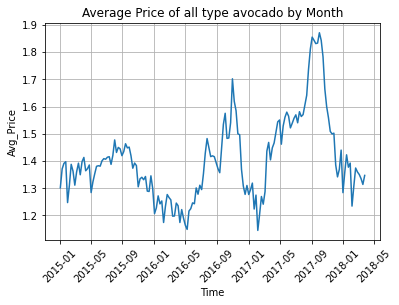

In [0]:
plt.plot(avg_price_groupby_date.index, avg_price_groupby_date)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Avg_Price')
plt.title('Average Price of all type avocado by Month')
plt.show()

As we can see, the highest price is at September of every year, it means near the end of the year. Moreover, the price is usually low at the beginning of year.

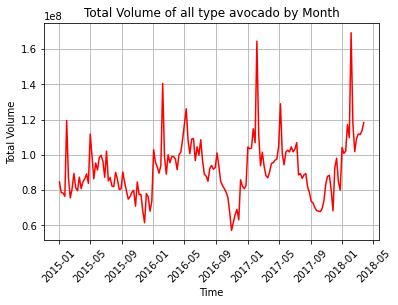

In [0]:
volume_groupby_date= new_avocado.groupby('Date')['Total Volume'].sum()
plt.plot(volume_groupby_date.index, volume_groupby_date,color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Total Volume')
plt.title('Total Volume of all type avocado by Month')
plt.show()

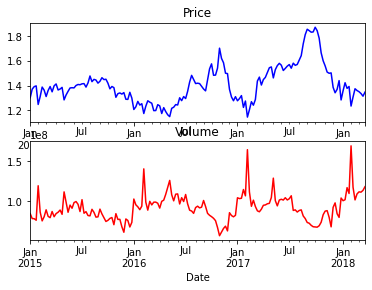

In [0]:
fig,axes= plt.subplots(2,1)
avg_price_groupby_date.plot(ax=axes[0],color='blue')
volume_groupby_date.plot(ax=axes[1],color='red')
axes[0].set_title('Price')
axes[1].set_title('Volume')
plt.show()

This plot is combine two graphs above. Through this graph, we can clearly see that, when the volume is large, the price is low and otherwise. We can understand the relation between supply and demand through this graph 

In [0]:
total_volumn_groupby_region= new_avocado.groupby('region')['Total Volume'].sum()

In [0]:
total_volumn_groupby_region= total_volumn_groupby_region.sort_values(ascending=False)
top10_region_has_maxvolume= total_volumn_groupby_region[:10]
#sort values

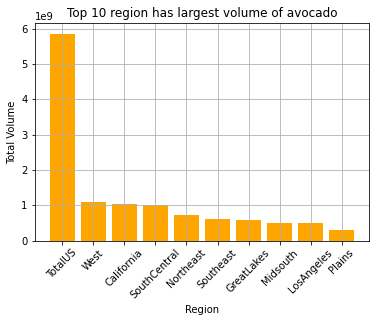

In [0]:
plt.bar(top10_region_has_maxvolume.index, top10_region_has_maxvolume,color='orange')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Top 10 region has largest volume of avocado')
plt.grid(True)
plt.show()

US has largest volume of avocado, about 6000 tons

In [0]:
new_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


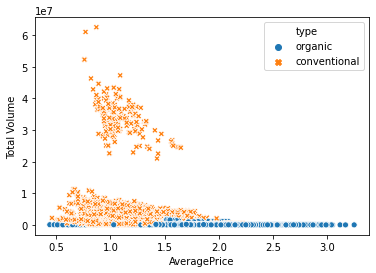

In [0]:
import seaborn as sns
sns.scatterplot(x='AveragePrice',y='Total Volume',hue='type',style='type',data= new_avocado)

There is no correlation between price and volume

In [0]:
print('Range:' ,min(new_avocado['AveragePrice']),' - ',max(new_avocado['AveragePrice']))

Range: 0.44  -  3.25


In [0]:
#now we use model to predict the average price
new_avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No missing value

In [0]:
new_avocado= avocado.copy()
y= new_avocado['AveragePrice']
x= new_avocado.copy()
x= x.drop(['AveragePrice','Date'],axis=1)

In [0]:
#only contain numerical and no label
x_num= x.drop(['type','region'],axis=1)

In [0]:
x_num.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [0]:
x.columns#contain all except label is avg price and date

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [0]:
new_avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [0]:
print(x.shape)#18249,11
print(x_num.shape)#18249,9

(18249, 11)
(18249, 9)


In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)#14599,11
print(x_test.shape)#3650,11

(14599, 11)
(3650, 11)


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_attribs = list(x_num)
cat_attribs = ["type",'region']

numerical_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

categorical_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numerical_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])
x_prepared= full_pipeline.fit_transform(x_train)

In [0]:
from sklearn.linear_model import LinearRegression#train on training set
lin_reg= LinearRegression()
lin_reg.fit(x_prepared,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#evaluate model on test set
from sklearn.metrics import mean_squared_error
x_test_prepared= full_pipeline.transform(x_test)
price_predict_test= lin_reg.predict(x_test_prepared)
price_predict_train= lin_reg.predict(x_prepared)
lin_mse_test_set= mean_squared_error(y_test,price_predict_test)
lin_mse_train_set= mean_squared_error(y_train,price_predict_train)
print('train mse: ',lin_mse_train_set,'test mse: ',lin_mse_test_set)

train mse:  0.0716220640669329 test mse:  0.07211287651354727


In [0]:
#decison tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(x_prepared, y_train)

price_predict_test= tree_reg.predict(x_test_prepared)
price_predict_train= tree_reg.predict(x_prepared)
tree_mse_test_set= mean_squared_error(y_test,price_predict_test)
tree_mse_train_set= mean_squared_error(y_train,price_predict_train)
print('train mse: ',tree_mse_train_set,'test mse: ',tree_mse_test_set)

train mse:  1.9756645555958108e-34 test mse:  0.0417033698630137


It looks better than linear regression above

In [0]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(x_prepared,y_train)

price_predict_test= forest_reg.predict(x_test_prepared)
price_predict_train= forest_reg.predict(x_prepared)
forest_mse_test_set= mean_squared_error(y_test,price_predict_test)
forest_mse_train_set= mean_squared_error(y_train,price_predict_train)
print('train mse: ',forest_mse_train_set,'test mse: ',forest_mse_test_set)

train mse:  0.003141122998835538 test mse:  0.02246608366849315


It looks more better than some above

In [0]:
#try support vector machine
from sklearn.svm import SVR

svm_reg= SVR(kernel='linear')
svm_reg.fit(x_prepared,y_train)

price_predict_test= svm_reg.predict(x_test_prepared)
price_predict_train= svm_reg.predict(x_prepared)
svm_mse_test_set= mean_squared_error(y_test,price_predict_test)
svm_mse_train_set= mean_squared_error(y_train,price_predict_train)
print('train mse: ',svm_mse_train_set,'test mse: ',svm_mse_test_set)


train mse:  0.07260738529043578 test mse:  0.07252944816895197


The quality is the nearly same as linear regression. Still now, random forest is the best

In [0]:
x_prepared[1:].shape#14599,65

(14598, 65)

In [0]:
#now is neuron network
tf.random.set_seed(42)
model= keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=x_prepared.shape),keras.layers.Dense(1)])
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(lr=1e-3))
history= model.fit(x_prepared,y_train,epochs=1000)
print('test_set: ')
mse_test= model.evaluate(x_test_prepared,y_test)

Epoch 1/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.4519
Epoch 2/1000
457/457 [==============================] - 1s 1ms/step - loss: 0.1457
Epoch 3/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1349
Epoch 4/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 5/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1250
Epoch 6/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 7/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1185
Epoch 8/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1158
Epoch 9/1000
457/457 [==============================] - 1s 1ms/step - loss: 0.1133
Epoch 10/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 11/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1090
Epoch 12/1000
457/457 [==============================] - 0s 1ms/step - loss: 0.1071
E

Quite good, but not the best. Try one more complicated neuron network

In [0]:
tf.random.set_seed(42)
model= keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=x_prepared.shape)])
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(lr=1e-3))
history= model.fit(x_prepared,y_train,epochs=100)
print('test_set: ')
mse_test= model.evaluate(x_test_prepared,y_test)

Epoch 1/100
457/457 [==============================] - 1s 2ms/step - loss: 0.5119
Epoch 2/100
457/457 [==============================] - 1s 2ms/step - loss: 0.1276
Epoch 3/100
457/457 [==============================] - 1s 2ms/step - loss: 0.1129
Epoch 4/100
457/457 [==============================] - 1s 2ms/step - loss: 0.1059
Epoch 5/100
457/457 [==============================] - 1s 2ms/step - loss: 0.1022
Epoch 6/100
457/457 [==============================] - 1s 2ms/step - loss: 0.1001
Epoch 7/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0986
Epoch 8/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0973
Epoch 9/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0963
Epoch 10/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0953
Epoch 11/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0945
Epoch 12/100
457/457 [==============================] - 1s 2ms/step - loss: 0.0937
Epoch 13/100


Not better than neuron above. Sumarry, random forest is the best. Simple but effective